# Problem Statement
In this problem, you'll train a CNN model to classify whether images contain either a dog or a cat.  This is easy for humans, dogs, and cats. Your computer will find it a bit more difficult. <br>
The Dogs vs. Cats dataset is a standard computer vision dataset that involves classifying photos as either containing a dog or cat. <br>
<br>
In this notebook, you will discover how to develop a convolutional neural network to classify photos of dogs and cats.
* How to load and prepare photos of dogs and cats for modeling.
* How to develop a convolutional neural network for photo classification from scratch and improve model performance.
* How to develop a model for photo classification using transfer learning.

# Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
import os

import matplotlib.pyplot as plt
import matplotlib.image as img
import seaborn as sns

'''setting seed'''
seed = 0
np.random.seed(seed)
tf.random.set_seed(3)

# Load and Extract data

In [3]:
import zipfile

zip_files = ['test1', 'train']

for zip_file in zip_files:
    with zipfile.ZipFile("./input/dogs-vs-cats/{}.zip".format(zip_file),"r") as z:
        z.extractall(".")
        print("{} unzipped".format(zip_file))

test1 unzipped
train unzipped


In [4]:
TRAIN_DIR_PATH = './train'
file_names = os.listdir(TRAIN_DIR_PATH)
print('There are {} number of images in directory.'.format(len(file_names)))

There are 25000 number of images in directory.


In [5]:
def to_dataframe(file_names):
    files, labels = list(), list()
    for file in file_names:
        files.append(file)
        labels.append(file[:3])
    df = pd.DataFrame({'filename':files, 'label':labels})
    return df

df = to_dataframe(file_names)

In [6]:
df.head()

,filename,label
0,cat.0.jpg,cat
1,cat.1.jpg,cat
2,cat.10.jpg,cat
3,cat.100.jpg,cat
4,cat.1000.jpg,cat


# Analyze data

data set label distribution:
 label
cat    12500
dog    12500
Name: count, dtype: int64


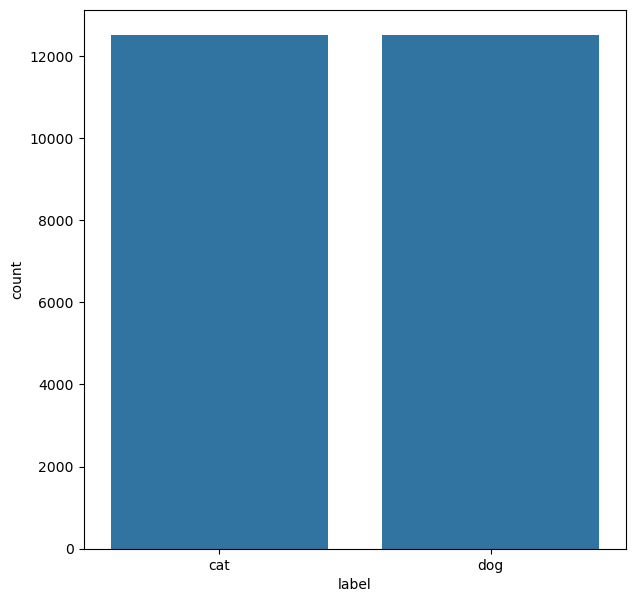

In [7]:
print('data set label distribution:\n',df['label'].value_counts())

plt.figure(figsize=(7,7))
sns.countplot(x = df['label'])
plt.show()

In [8]:
cat = [file for file in file_names if file[:3]=='cat']
dog = [file for file in file_names if file[:3]=='dog']

(500, 240, 3)


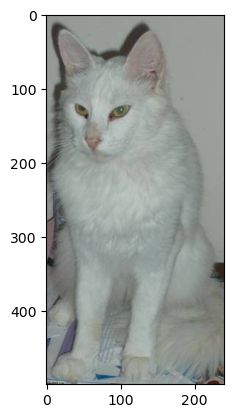

In [9]:
# Randomly print a CAT Image
im = img.imread('./train/cat.11789.jpg')
print(im.shape)
plt.imshow(im)
plt.show()

(500, 388, 3)


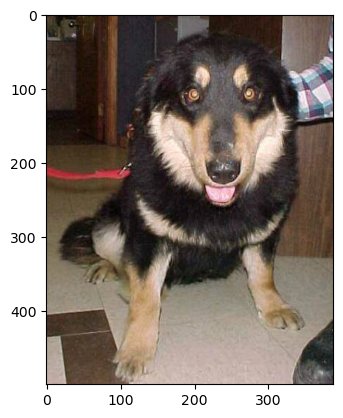

In [10]:
# Randomly print a CAT Image
im = img.imread('./train/dog.11789.jpg')
print(im.shape)
plt.imshow(im)
plt.show()

## Randomly Print Images

(374, 500, 3)
(169, 180, 3)
(229, 340, 3)
(374, 499, 3)


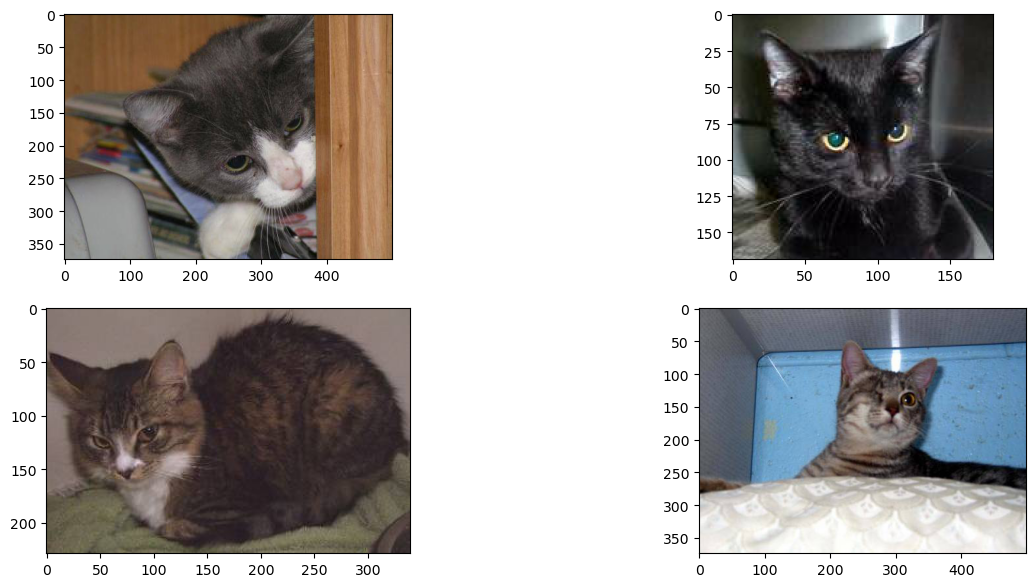

In [11]:
plt.figure(figsize=(15,7))
for i, c in enumerate(np.random.randint(0,len(cat),4), start=1):
    im = img.imread('./train/'+cat[c])
    print(im.shape)
    plt.subplot(2,2,i)
    plt.imshow(im)
plt.show()

(355, 500, 3)
(458, 383, 3)
(408, 307, 3)
(500, 351, 3)


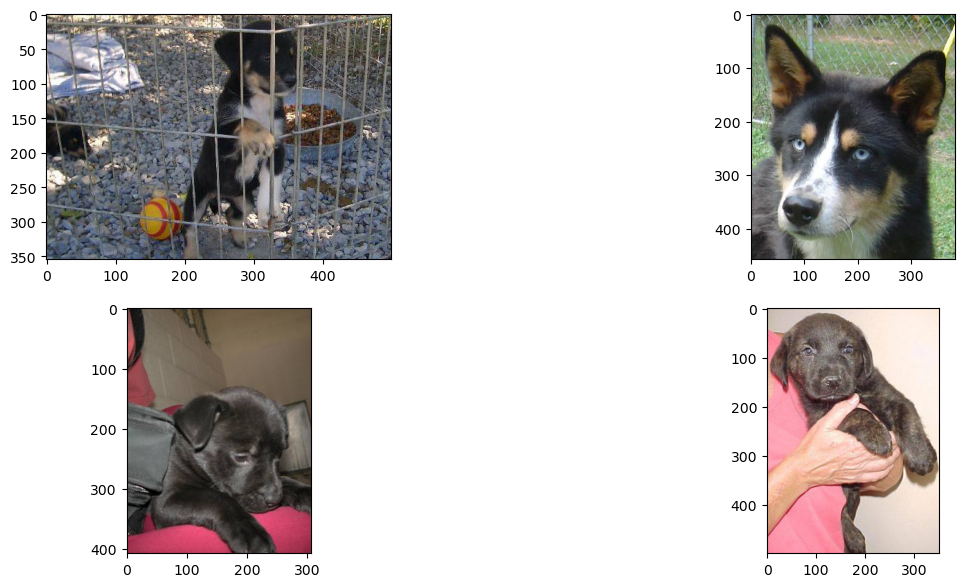

In [12]:
plt.figure(figsize=(15,7))
for i, c in enumerate(np.random.randint(0,len(dog),4), start=1):
    im = img.imread('./train/'+dog[c])
    plt.subplot(2,2,i)
    print(im.shape)
    plt.imshow(im)
plt.show()

Looking at a few random photos in the directory, you can see that the photos are color and have different shapes and sizes.

# Split data

In [13]:
from sklearn.model_selection import train_test_split
train_set, valid_set = train_test_split(df, test_size=0.2,random_state=seed)

In [14]:
train_set.shape, valid_set.shape

((20000, 2), (5000, 2))

train set distribution:
 label
cat    10004
dog     9996
Name: count, dtype: int64

valid set distribution:
 label
dog    2504
cat    2496
Name: count, dtype: int64



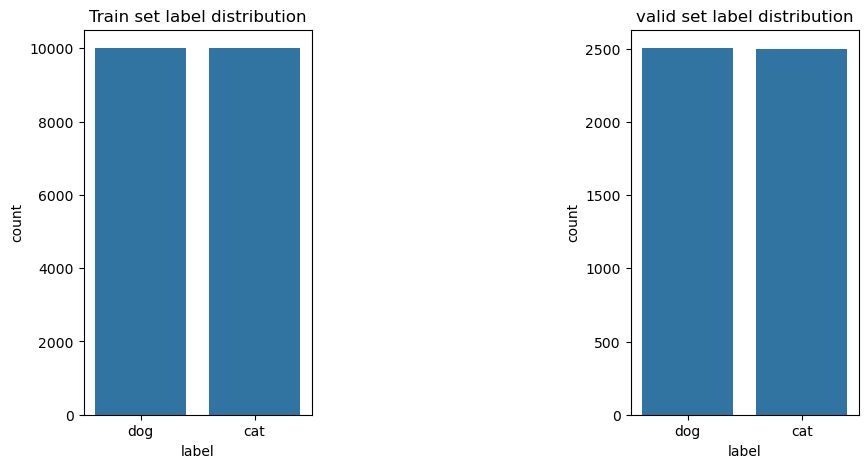

In [15]:
print('train set distribution:\n',train_set['label'].value_counts())
print('\nvalid set distribution:\n',valid_set['label'].value_counts())
print()

plt.figure(figsize=(10,5))
plt.subplot(1,3,1)
sns.countplot(x=train_set['label'], order=['dog','cat'])
plt.title('Train set label distribution')

plt.subplot(1,3,3)
sns.countplot(x=valid_set['label'], order=['dog','cat'])
plt.title('valid set label distribution')
plt.show()

Hence it's a balanced dataset

# Image data Generator and Data Augmentation

In [16]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

WIDTH, HEIGHT = 150, 150
batch_size = 32

In [25]:
train_datagenerator = ImageDataGenerator(rotation_range=15, 
                                  rescale=1./255, 
                                  shear_range=0.1,
                                  zoom_range=0.2,
                                  horizontal_flip=True,
                                  width_shift_range=0.1,
                                  height_shift_range=0.1)

training_data = train_datagenerator.flow_from_dataframe(dataframe=train_set, 
                                                        directory='./train',
                                                       x_col='filename',
                                                       y_col='label',
                                                       target_size=(WIDTH, HEIGHT),
                                                       class_mode='categorical',
                                                       batch_size=batch_size)

Found 20000 validated image filenames belonging to 2 classes.


In [31]:
training_data.class_indices

{'cat': 0, 'dog': 1}

In [32]:
training_data

In [27]:
training_data.filenames[:10]

['cat.7986.jpg',
 'dog.4066.jpg',
 'dog.1049.jpg',
 'dog.6732.jpg',
 'dog.2250.jpg',
 'dog.6835.jpg',
 'cat.11832.jpg',
 'dog.11221.jpg',
 'cat.10491.jpg',
 'dog.8079.jpg']

In [28]:
# new_dict={}
# for key, value in training_data.class_indices.items():
#     new_dict[value]=key 

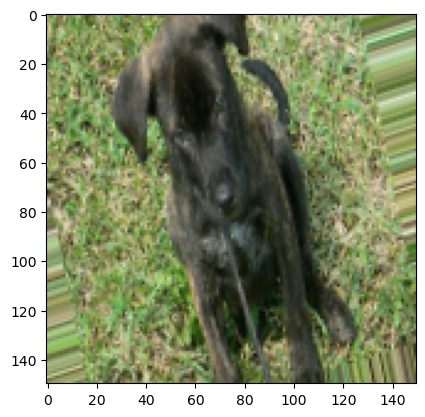

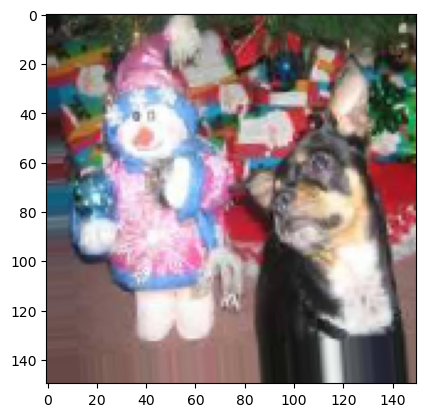

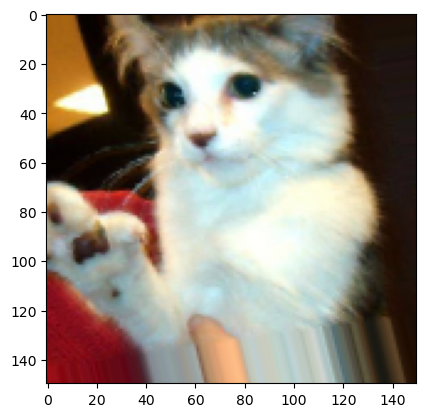

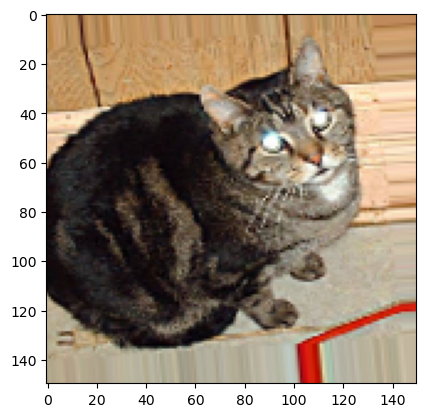

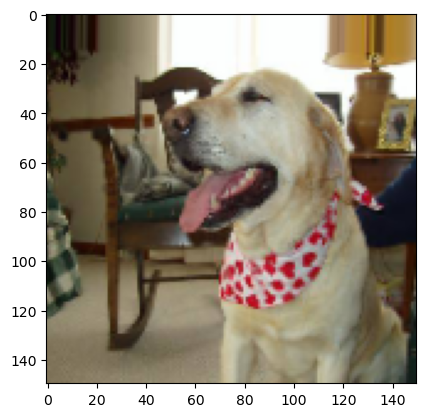

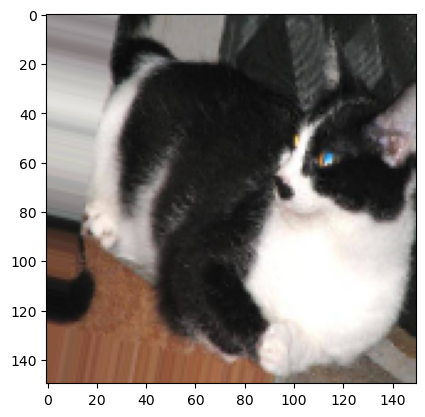

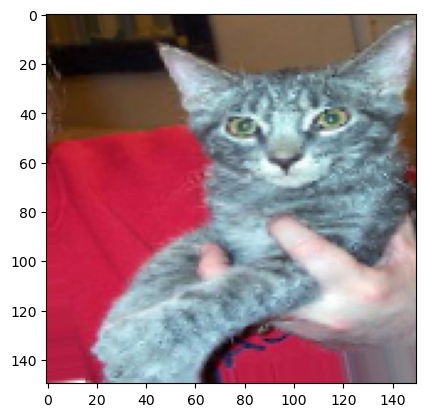

In [33]:
for i in range(len(training_data.filenames)):
    #image, label = training_data.next()
    image, label = next(iter(training_data))

    # display the image from the iterator
    plt.imshow(image[0])
#     print(new_dict[label[0]])
    plt.show()
    if i >5:
        break

In [34]:
valid_datagenerator = ImageDataGenerator(rescale=1./255)
validation_data = valid_datagenerator.flow_from_dataframe(dataframe=valid_set,
                                                         directory='./train',
                                                         x_col='filename',
                                                         y_col='label',
                                                         target_size=(WIDTH,HEIGHT),
                                                         class_mode='categorical',
                                                         batch_size=batch_size)

Found 5000 validated image filenames belonging to 2 classes.


# Making CNN Model

In [35]:
from tensorflow.keras.layers import *
from functools import partial

DefaultConv2D = partial(keras.layers.Conv2D, kernel_size=3, activation='relu', padding="SAME")

model = keras.models.Sequential()

model.add(DefaultConv2D(filters=32, kernel_size=5, input_shape=(WIDTH, HEIGHT, 3)))
model.add(MaxPooling2D(pool_size=2))

model.add(DefaultConv2D(filters=64))
model.add(DefaultConv2D(filters=64))
model.add(MaxPooling2D(pool_size=2))

model.add(DefaultConv2D(filters=128))
model.add(DefaultConv2D(filters=128))
model.add(MaxPooling2D(pool_size=2))

model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(32, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(2, activation='softmax'))

C:\Users\arvenka\AppData\Local\anaconda3\envs\tensorflow\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [36]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 150, 150, 32)   │         2,432 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 75, 75, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 75, 75, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 75, 75, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 37, 37, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 37, 37, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 37, 37, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 18, 18, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 41472)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │     2,654,272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 2)              │            66 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,935,714 (11.20 MB)

 Trainable params: 2,935,714 (11.20 MB)

 Non-trainable params: 0 (0.00 B)

# Callbacks

In [38]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
import datetime
earlystop_cb = EarlyStopping(patience=10, restore_best_weights=True)
reduce_lr_cb = ReduceLROnPlateau(factor=0.5, patience=5, monitor='val_loss', min_lr=0.00001)
checkpoint_cb = ModelCheckpoint('model.keras', save_best_only=True)
# Tensorboard Setup
# -- Define Logging Directory & TimeStamp --
log_dir = "logs/fit/" + datetime.datetime.now().strftime("%d%m%Y-%H%M")

# --TensorBoard CallBack --
tensorBoard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)


callbacks = [earlystop_cb, reduce_lr_cb, checkpoint_cb,tensorBoard_callback]

# Train the Model

In [39]:
opt = keras.optimizers.SGD(learning_rate=0.01, momentum=0.9)
model.compile(loss="categorical_crossentropy", optimizer=opt, metrics=['accuracy'])

In [ ]:
!kill 654

In [ ]:
# # %load_ext tensorboard
# %reload_ext tensorboard
# # %tensorboard --logdir logs/fit


In [40]:
history = model.fit(training_data,
                   epochs=10,
                   validation_data=validation_data,
#                    validation_steps=valid_set.shape[0]//batch_size,
#                    steps_per_epoch=train_set.shape[0]//batch_size, 
                     validation_steps=10,
                     steps_per_epoch=10, 
                    
                   callbacks=callbacks)

Epoch 1/10


C:\Users\arvenka\AppData\Local\anaconda3\envs\tensorflow\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


10/10 ━━━━━━━━━━━━━━━━━━━━ 13s 942ms/step - accuracy: 0.4995 - loss: 0.6942 - val_accuracy: 0.4625 - val_loss: 0.6940 - learning_rate: 0.0100
Epoch 2/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 8s 846ms/step - accuracy: 0.5190 - loss: 0.6899 - val_accuracy: 0.5031 - val_loss: 0.6942 - learning_rate: 0.0100
Epoch 3/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 9s 974ms/step - accuracy: 0.5771 - loss: 0.6847 - val_accuracy: 0.5156 - val_loss: 0.6952 - learning_rate: 0.0100
Epoch 4/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 8s 790ms/step - accuracy: 0.4772 - loss: 0.7030 - val_accuracy: 0.4688 - val_loss: 0.6956 - learning_rate: 0.0100
Epoch 5/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 9s 969ms/step - accuracy: 0.5278 - loss: 0.6906 - val_accuracy: 0.5219 - val_loss: 0.6929 - learning_rate: 0.0100
Epoch 6/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 8s 834ms/step - accuracy: 0.5450 - loss: 0.6977 - val_accuracy: 0.4938 - val_loss: 0.6940 - learning_rate: 0.0100
Epoch 7/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 9s 912ms/step - accuracy: 0.4886 - loss: 0.6973 - val_accura

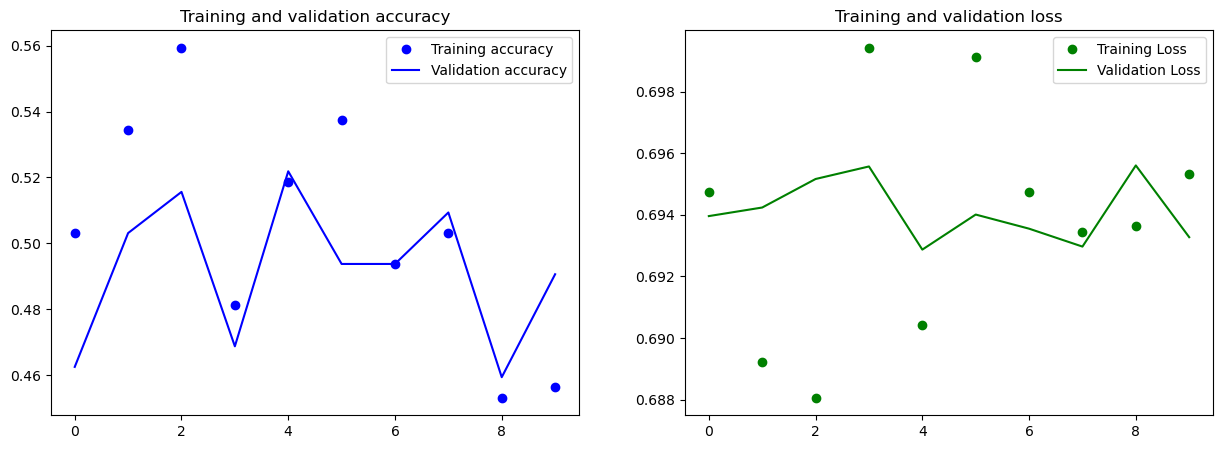

In [41]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()


plt.subplot(1,2,2)
plt.plot(epochs, loss, 'go', label='Training Loss')
plt.plot(epochs, val_loss, 'g', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

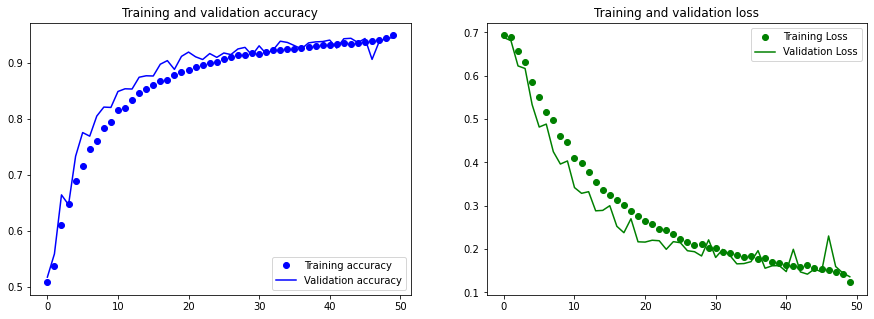

# Evaluate Model

In [42]:
model1 = keras.models.load_model('model.keras')

In [43]:
test_loss, test_acc = model1.evaluate(validation_data, steps=len(validation_data), verbose=1)
print('Loss: %.3f' % (test_loss))
print('Accuracy: %.3f' % (test_acc * 100.0)) 

157/157 ━━━━━━━━━━━━━━━━━━━━ 33s 208ms/step - accuracy: 0.5013 - loss: 0.6968
Loss: 0.697
Accuracy: 49.920


### The VGG Architecture works well on the data
### So the next we'll going to train VGG16 architecture (transfer learning)

# Transfer Learning

In [44]:
base_model = keras.applications.vgg16.VGG16(weights="imagenet", include_top=False, input_shape=(WIDTH,HEIGHT,3))
base_model.trainable = False ## Not trainable weights

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 30s 1us/step


In [45]:
base_model.summary()

Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 150, 150, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 150, 150, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 150, 150, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 75, 75, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 75, 75, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 75, 75, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 37, 37, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 37, 37, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 37, 37, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 37, 37, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 18, 18, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 18, 18, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 18, 18, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 18, 18, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 9, 9, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 9, 9, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 9, 9, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 9, 9, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 4, 4, 512)      │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,714,688 (56.13 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 14,714,688 (56.13 MB)

In [46]:
from tensorflow.keras.layers import *

model = keras.models.Sequential()
model.add(base_model)
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(2, activation='softmax'))

In [47]:
opt = keras.optimizers.SGD(learning_rate=0.01, momentum=0.9)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

In [48]:
history = model.fit(training_data,
            epochs=4,
            validation_data=validation_data,
#             validation_steps=valid_set.shape[0]//batch_size,
#             steps_per_epoch=train_set.shape[0]//batch_size, 
                     validation_steps=10,
                     steps_per_epoch=10, 
            )

Epoch 1/4
10/10 ━━━━━━━━━━━━━━━━━━━━ 27s 3s/step - accuracy: 0.5197 - loss: 1.0137 - val_accuracy: 0.5375 - val_loss: 0.6471
Epoch 2/4
10/10 ━━━━━━━━━━━━━━━━━━━━ 26s 3s/step - accuracy: 0.4955 - loss: 0.7212 - val_accuracy: 0.7531 - val_loss: 0.5786
Epoch 3/4
10/10 ━━━━━━━━━━━━━━━━━━━━ 26s 3s/step - accuracy: 0.7450 - loss: 0.5624 - val_accuracy: 0.8250 - val_loss: 0.4380
Epoch 4/4
10/10 ━━━━━━━━━━━━━━━━━━━━ 26s 3s/step - accuracy: 0.7386 - loss: 0.5462 - val_accuracy: 0.7500 - val_loss: 0.5065


In [49]:
test_loss, test_acc = model.evaluate(validation_data, steps=len(validation_data), verbose=1)
print('Loss: %.3f' % (test_loss))
print('Accuracy: %.3f' % (test_acc * 100.0)) 

157/157 ━━━━━━━━━━━━━━━━━━━━ 208s 1s/step - accuracy: 0.7441 - loss: 0.4911
Loss: 0.482
Accuracy: 75.080


In [50]:
model.layers[0].trainable=True

In [51]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)              │ (None, 4, 4, 512)      │    14,714,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 8192)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 128)            │     1,048,704 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 2)              │           258 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 16,812,614 (64.14 MB)

 Trainable params: 15,763,650 (60.13 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 1,048,964 (4.00 MB)

In [53]:
checkpoint_cb = keras.callbacks.ModelCheckpoint('model1.keras',save_best_only=True)
earlystop_cb = keras.callbacks.EarlyStopping(patience=5, restore_best_weights=True)

opt = keras.optimizers.SGD(learning_rate=0.001, momentum=0.9)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(training_data,
            epochs=5,
            validation_data=validation_data,
#             validation_steps=valid_set.shape[0]//batch_size,
#             steps_per_epoch=train_set.shape[0]//batch_size, 
                     validation_steps=10,
                     steps_per_epoch=10, 
            callbacks=[checkpoint_cb, earlystop_cb])

Epoch 1/5
10/10 ━━━━━━━━━━━━━━━━━━━━ 61s 6s/step - accuracy: 0.8155 - loss: 0.4332 - val_accuracy: 0.8469 - val_loss: 0.3601
Epoch 2/5
10/10 ━━━━━━━━━━━━━━━━━━━━ 60s 6s/step - accuracy: 0.8457 - loss: 0.4197 - val_accuracy: 0.9094 - val_loss: 0.2420
Epoch 3/5
10/10 ━━━━━━━━━━━━━━━━━━━━ 60s 6s/step - accuracy: 0.8876 - loss: 0.2831 - val_accuracy: 0.9281 - val_loss: 0.1927
Epoch 4/5
10/10 ━━━━━━━━━━━━━━━━━━━━ 59s 6s/step - accuracy: 0.9136 - loss: 0.2629 - val_accuracy: 0.9469 - val_loss: 0.1727
Epoch 5/5
10/10 ━━━━━━━━━━━━━━━━━━━━ 59s 6s/step - accuracy: 0.9240 - loss: 0.1703 - val_accuracy: 0.9312 - val_loss: 0.1817


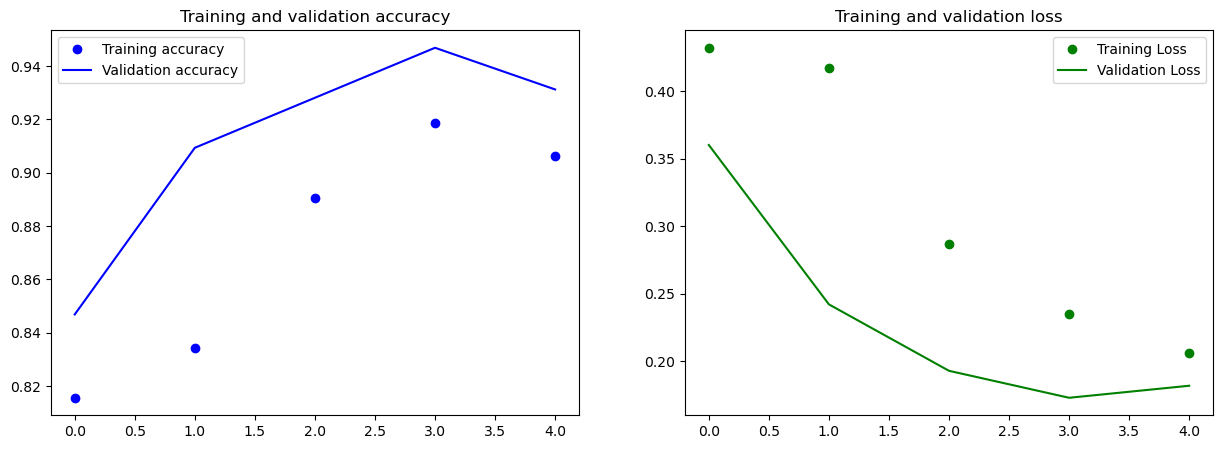

In [54]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()


plt.subplot(1,2,2)
plt.plot(epochs, loss, 'go', label='Training Loss')
plt.plot(epochs, val_loss, 'g', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [56]:
model2 = keras.models.load_model('model1.keras')

AttributeError: Exception encountered when calling Flatten.call().

[1m'list' object has no attribute 'shape'[0m

Arguments received by Flatten.call():
  • args=(['<KerasTensor shape=(None, 4, 4, 512), dtype=float32, sparse=False, name=keras_tensor_311>'],)
  • kwargs=<class 'inspect._empty'>

In [ ]:
test_loss, test_acc = model2.evaluate(validation_data, steps=len(validation_data), verbose=1)
print('Loss: %.3f' % (test_loss))
print('Accuracy: %.3f' % (test_acc * 100.0))

Nothing better than this....

# Make Predictions

In [57]:
sampleSubmission = pd.read_csv('./input/dogs-vs-cats/sampleSubmission.csv')
test_df = sampleSubmission.copy()
test_df['id'] = test_df['id'].apply(lambda x : str(x)+'.jpg')

In [58]:
test_gen = ImageDataGenerator(rescale=1./255)
test_generator = test_gen.flow_from_dataframe(test_df, 
                                                "./test1/", 
                                                x_col='id',
                                                y_col=None,
                                                class_mode=None,
                                                target_size=(WIDTH,HEIGHT),
                                                batch_size=batch_size,
                                                shuffle=False)

Found 12500 validated image filenames.


In [60]:
predict = model1.predict(test_generator, steps=np.ceil(test_df.shape[0]/batch_size))

TypeError: 'numpy.float64' object cannot be interpreted as an integer

In [ ]:
sampleSubmission['label'] = np.argmax(predict, axis=-1)
sampleSubmission.to_csv('submission.csv', index=False)

In [ ]:
test_df['label'] = sampleSubmission['label'].replace({ 1: 'dog', 0: 'cat' })

In [ ]:
# sample_test = test_df.values[np.random.randint(0, len(test_df), 16)]
# sample_test
# plt.figure(figsize=(15, 17))
# for index, row in enumerate(sample_test):
#     filename = row[0]
#     category = row[1]
#     image = img.imread("./test1/"+filename)
#     plt.subplot(4, 4, index+1)
#     plt.imshow(image)
#     plt.xlabel('Predicted: ' + "{}".format(category) )
# plt.tight_layout()
# plt.show()

## Hurrayyy
## ALL are correctlty predicted

## Upvote If you like it !